# **Linear Separability and Non-Linearity**

This code explores the performance of advanced activation functions, such as **polynomial neurons**, **Radial Basis Functions (RBFs)**, and **leaky ReLU**, by applying them to synthetic datasets and evaluating their impact on decision boundaries, convergence time, and accuracy. Three synthetic datasets are used: XOR (to assess non-linear separability), concentric circles (to evaluate localized clustering), and crescent-shaped moons (for complex cluster separability). These datasets are standardized, split into training and testing sets, and then passed through models utilizing the custom activation functions.

The script defines a modular framework where a neural network can be built with selectable activation mechanisms. The **polynomial activation** function allows neurons to model intricate decision boundaries through higher-order transformations. The **RBF activation** produces localized decision boundaries by emphasizing proximity-based responses, while the **leaky ReLU** addresses the vanishing gradient problem with a small slope for negative inputs. The training process includes measuring convergence time and evaluating test accuracy, and the results are visualized as decision boundaries across datasets and activation types. This visualization provides insights into how each activation enhances the network’s ability to represent and classify complex patterns.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3521/3521 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3521/3521 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3521/3521 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2646/2646 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2646/2646 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2646/2646 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2583/2583 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2583/2583 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2583/2583 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


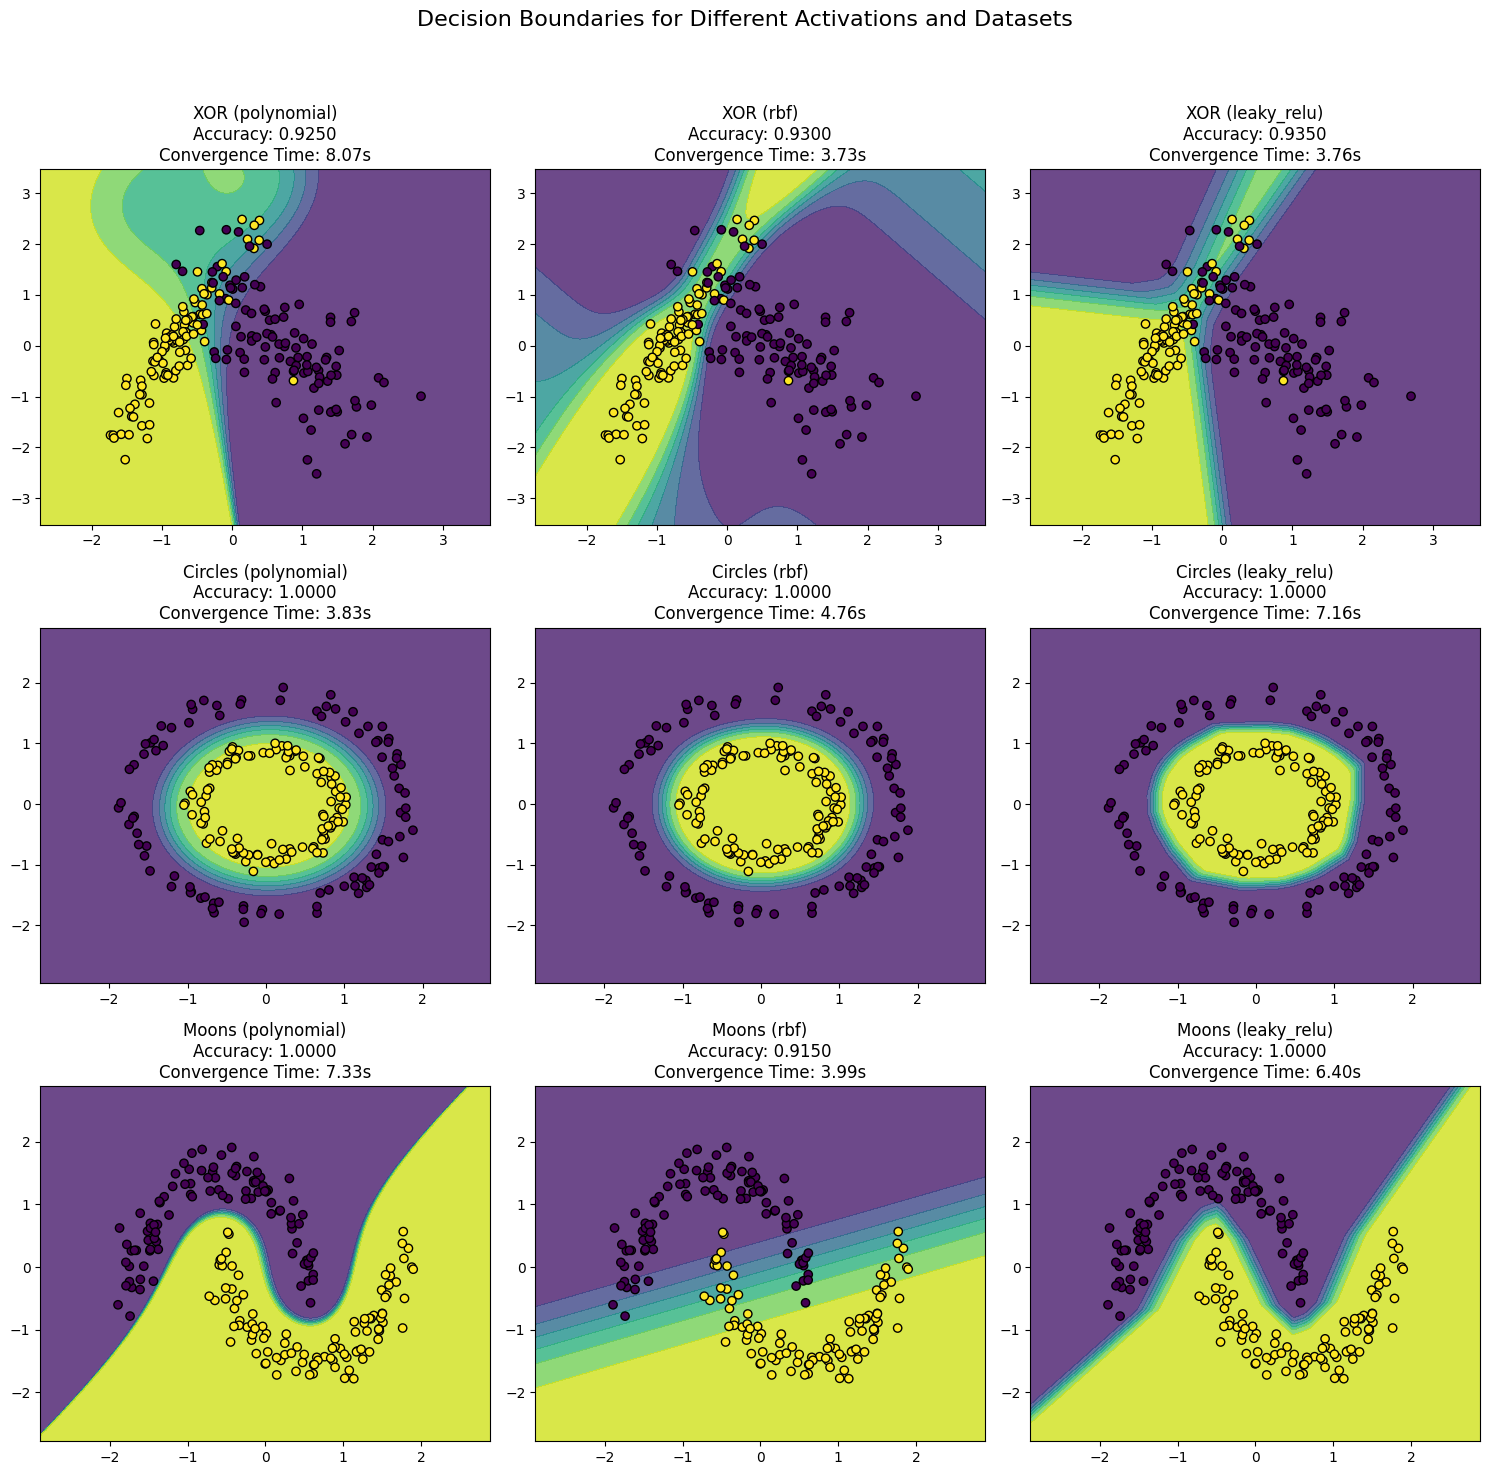

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input, Lambda
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam

# 1. Generate synthetic datasets
def generate_datasets():
    """
    Generate synthetic datasets for testing non-linear separability.
    - XOR: A dataset with features that are not linearly separable.
    - Concentric Circles: Another non-linearly separable dataset with circular patterns.
    - Moons: A dataset with crescent-shaped clusters.

    Returns:
    Dict: A dictionary of datasets where each key is the dataset name, and each value contains (X_train, X_test, y_train, y_test).
    """
    datasets = {}

    # XOR dataset
    X_xor, y_xor = make_classification(
        n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_samples=1000
    )
    y_xor = (y_xor > 0.5).astype(int)  # Convert to binary labels
    X_train, X_test, y_train, y_test = train_test_split(X_xor, y_xor, test_size=0.2, random_state=42)
    datasets["XOR"] = (X_train, X_test, y_train, y_test)

    # Concentric circles dataset
    X_circles, y_circles = make_circles(n_samples=1000, factor=0.5, noise=0.05)
    X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, test_size=0.2, random_state=42)
    datasets["Circles"] = (X_train, X_test, y_train, y_test)

    # Moons dataset
    X_moons, y_moons = make_moons(n_samples=1000, noise=0.1)
    X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)
    datasets["Moons"] = (X_train, X_test, y_train, y_test)

    return datasets

# 2. Define custom activation functions
def polynomial_activation(x, degree=3):
    """
    Define a polynomial activation function.
    Args:
    x: Input tensor.
    degree: Degree of the polynomial.
    Returns:
    Tensor: Output tensor after applying the polynomial transformation.
    """
    return tf.pow(x, degree)

def rbf_activation(x):
    """
    Define a Radial Basis Function (RBF) activation function.
    Args:
    x: Input tensor.
    Returns:
    Tensor: Output tensor after applying the RBF transformation.
    """
    return tf.exp(-tf.square(x))

def leaky_relu_activation(x, alpha=0.1):
    """
    Define a Leaky ReLU activation function.
    Args:
    x: Input tensor.
    alpha: Slope for negative inputs.
    Returns:
    Tensor: Output tensor after applying the Leaky ReLU transformation.
    """
    return tf.maximum(alpha * x, x)

# 3. Build the model with selectable activation mechanisms
def build_model(input_dim, activation="polynomial"):
    """
    Build a neural network model with a specified activation mechanism.
    Args:
    input_dim (int): Number of input features.
    activation (str): Type of activation mechanism ("polynomial", "rbf", "leaky_relu").
    Returns:
    tf.keras.Model: Compiled model.
    """
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # Input layer

    # Add a hidden layer with the specified activation
    if activation == "polynomial":
        model.add(Dense(32, kernel_initializer=RandomNormal(mean=0.0, stddev=0.05)))
        model.add(Lambda(lambda x: polynomial_activation(x, degree=3)))
    elif activation == "rbf":
        model.add(Dense(32, kernel_initializer=RandomNormal(mean=0.0, stddev=0.05)))
        model.add(Lambda(rbf_activation))
    elif activation == "leaky_relu":
        model.add(Dense(32, kernel_initializer=RandomNormal(mean=0.0, stddev=0.05)))
        model.add(Lambda(leaky_relu_activation))

    # Output layer for binary classification
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])
    return model

# 4. Train and evaluate the models with convergence time
def train_and_evaluate(datasets, activations):
    """
    Train and evaluate models using different activation mechanisms on various datasets.
    Generate a single 3x3 plot grid for all results and include convergence time in the analysis.
    Args:
    datasets (dict): Dictionary of datasets.
    activations (list): List of activation mechanisms ("polynomial", "rbf", "leaky_relu").
    """
    fig, axes = plt.subplots(len(datasets), len(activations), figsize=(15, 15))
    fig.suptitle("Decision Boundaries for Different Activations and Datasets", fontsize=16)

    for i, (dataset_name, (X_train, X_test, y_train, y_test)) in enumerate(datasets.items()):
        # Standardize the dataset
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        for j, activation in enumerate(activations):
            # Build the model
            model = build_model(input_dim=X_train.shape[1], activation=activation)

            # Measure convergence time
            import time
            start_time = time.time()
            model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
            end_time = time.time()
            convergence_time = end_time - start_time

            # Evaluate the model on test data
            y_pred = (model.predict(X_test) > 0.5).astype(int)
            acc = accuracy_score(y_test, y_pred)

            # Visualize decision boundary on the subplot
            ax = axes[i, j]
            visualize_decision_boundary_on_ax(model, X_test, y_test, ax=ax)
            ax.set_title(
                f"{dataset_name} ({activation})\nAccuracy: {acc:.4f}\nConvergence Time: {convergence_time:.2f}s"
            )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# 5. Visualize decision boundaries on specific axes
def visualize_decision_boundary_on_ax(model, X, y, ax):
    """
    Visualize the decision boundary of the trained model on a given axis.
    Args:
    model (tf.keras.Model): Trained model.
    X (np.array): Input features.
    y (np.array): Labels.
    ax (matplotlib.axes.Axes): Axis to plot the decision boundary on.
    """
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", marker="o")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# Run the program
if __name__ == "__main__":
    # Generate datasets
    datasets = generate_datasets()

    # Define activation mechanisms
    activations = ["polynomial", "rbf", "leaky_relu"]

    # Train and evaluate models for all activations and datasets
    train_and_evaluate(datasets, activations)


